In [2]:
# importing libraries

import numpy as np
import pandas as pd

In [4]:
#importing the dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

df = pd.read_csv(url, names=features)


In [10]:
#visualizing the imported data
print (df)

     sepal-length  sepal-width  petal-length  petal-width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [12]:
#data preprocessing

X = df.iloc[:, 0:4].values #features
y = df.iloc[:, 4].values #outcomes

In [19]:
#splitting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [20]:
#feature scaling for LDA

#importing necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [22]:
#performing LDA

#importing the neccessary libraries

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [30]:
# training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state =0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('actual output: \n \n', y_test)

print ('\n \n predicted output: \n \n', y_pred)


actual output: 
 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']

 
 predicted output: 
 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-v

In [31]:
#evaluating the performance 

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print ("confusion matrix: ", cm)

print ('\n accuracy: ', accuracy_score(y_test, y_pred))

confusion matrix:  [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

 accuracy:  0.9666666666666667


In [32]:
# now lets use LDA in yesterday's problem of heart failure prediction and compare its accuracy with that of SVM and KNN

In [39]:
# 1. with SVM

# link here: http://localhost:8888/notebooks/Day10%3A%20SVM%20with%20feature%20extraction-II.ipynb

svm_accuracy = 0.8023255813953488

# 2. with KNN

knn_accuracy = 0.8111111111111111 
# link here : http://localhost:8888/notebooks/Day11_Starting%20with%20KNN%20Algorithm.ipynb






In [40]:
# 3. with LDA

#importing the data set using pandas

import pandas as pd

df = pd.read_csv(r"Heart Fail Prediction.csv")

print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [41]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 
           'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
X = df [features]
y = df ['DEATH_EVENT']

In [42]:
# feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func = chi2, k = 6)
fit = bestfeatures.fit(X, y) #applying the chi2 rule
dfcolumns = pd.DataFrame(X.columns)
dfscores = pd.DataFrame(fit.scores_)

#for better visualization, concatinating two dataframes

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['specifications', 'score'] # naming the dataframe columns
print('\n 6 Best Features are: \n \n', featureScores.nlargest(6, 'score')) # printig best 6 features


 6 Best Features are: 
 
               specifications         score
6                  platelets  26135.771990
11                      time   3826.892661
2   creatinine_phosphokinase   1897.314839
4          ejection_fraction     79.072541
0                        age     44.619455
7           serum_creatinine     19.814118


In [43]:
# selecting features 


features = ['platelets', 'creatinine_phosphokinase', 'ejection_fraction', 'age']
X = df[features]
# y is already defined, no need to change it here

print(X)

     platelets  creatinine_phosphokinase  ejection_fraction   age
0    265000.00                       582                 20  75.0
1    263358.03                      7861                 38  55.0
2    162000.00                       146                 20  65.0
3    210000.00                       111                 20  50.0
4    327000.00                       160                 20  65.0
..         ...                       ...                ...   ...
294  155000.00                        61                 38  62.0
295  270000.00                      1820                 38  55.0
296  742000.00                      2060                 60  45.0
297  140000.00                      2413                 38  45.0
298  395000.00                       196                 45  50.0

[299 rows x 4 columns]


<AxesSubplot:xlabel='age'>

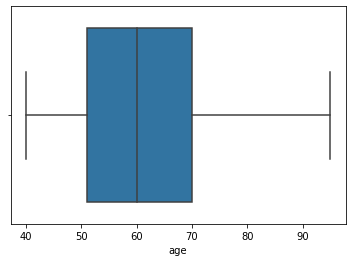

In [44]:
# box plotting

import seaborn as sns
sns.boxplot(x = df['age'])

<AxesSubplot:xlabel='platelets'>

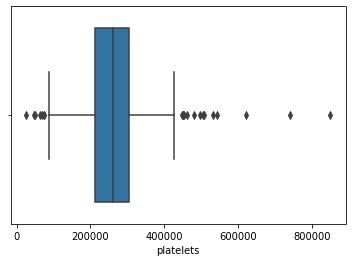

In [45]:
sns.boxplot(x = df['platelets'])

In [46]:
# lets remove outliers reasonably
df[df['platelets']>500000]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
105,72.0,1,328,0,30,1,621000.0,1.7,138,0,1,88,1
109,45.0,0,292,1,35,0,850000.0,1.3,142,1,1,88,0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94,0
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205,0
240,70.0,0,81,1,35,1,533000.0,1.3,139,0,0,212,0
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0


In [47]:
# lets remove them

df= df[df['platelets']<500000]

<AxesSubplot:xlabel='creatinine_phosphokinase'>

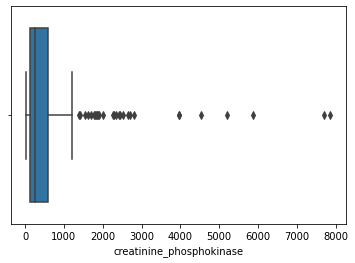

In [48]:
# lets look into creatinine_phosphokinase

sns.boxplot(x = df['creatinine_phosphokinase'])

In [49]:
# much more outliers
df[df['creatinine_phosphokinase']>3000]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
52,60.0,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1
103,42.0,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0
134,81.0,0,4540,0,35,0,231000.00,1.18,137,1,1,107,0
171,52.0,0,3966,0,40,0,325000.00,0.90,140,1,1,146,0


In [50]:
# lets remove them
df = df[df['creatinine_phosphokinase']<3000]

<AxesSubplot:xlabel='ejection_fraction'>

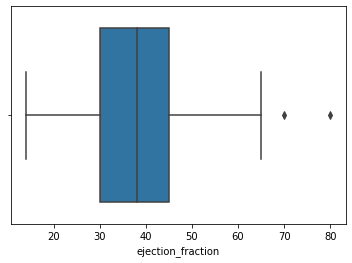

In [51]:
# for ejection_fraction

sns.boxplot(df['ejection_fraction'])

In [52]:
# lets remove outliers

df[df['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [53]:
# lets remove them
df = df[df['ejection_fraction']<70]

<AxesSubplot:xlabel='ejection_fraction'>

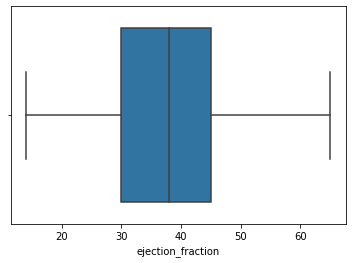

In [54]:
# lets cross check
sns.boxplot(df['ejection_fraction'])

In [56]:
#we are good here! and we are done in data cleaning part

# checking the accuracy again of the KNN model

# spliting training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [63]:
#feature scaling for LDA

#importing necessary libraries

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
#performing LDA

#importing the neccessary libraries

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [78]:
# training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 3, random_state =0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('actual output: \n \n', y_test)

print ('\n \n predicted output: \n \n', y_pred)

actual output: 
 
 130    0
77     0
135    0
156    0
0      1
      ..
102    0
124    1
68     1
65     1
113    1
Name: DEATH_EVENT, Length: 90, dtype: int64

 
 predicted output: 
 
 [0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0]


In [79]:
#evaluating the performance 

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print ("confusion matrix: ", cm)

print ('\n accuracy: ', accuracy_score(y_test, y_pred))

confusion matrix:  [[53  9]
 [14 14]]

 accuracy:  0.7444444444444445


In [81]:
print ('accuracy with SVM: ', svm_accuracy)
print ('accuracy with KNN: ', knn_accuracy)
print ('accuracy with LDA: ', accuracy_score(y_test, y_pred))

accuracy with SVM:  0.8023255813953488
accuracy with KNN:  0.8111111111111111
accuracy with LDA:  0.7444444444444445
